In [1]:
library(tidyverse)

Warning message:
“Installed Rcpp (0.12.14) different from Rcpp used to build dplyr (0.12.13).
Please reinstall dplyr to avoid random crashes or undefined behavior.”Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [21]:
data_path <- '../data/'
df <- read_csv(paste0(data_path, 'predicted_Q_physician_df_val.csv'))

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_integer(),
  subject_id = col_integer(),
  hadm_id = col_integer(),
  icustay_id = col_integer(),
  interval_start_time = col_datetime(format = ""),
  interval_end_time = col_datetime(format = ""),
  discrete_action = col_integer(),
  hospital_expire_flag = col_integer(),
  reward = col_integer()
)
See spec(...) for full column specifications.


In [72]:
head(df)

X1,subject_id,hadm_id,icustay_id,interval_start_time,interval_end_time,ALBUMIN,ANION GAP,BANDS,BICARBONATE,⋯,qsofa_gcs_score,qsofa_resprate_score,elixhauser_hospital,blood_culture_positive,discrete_action,hospital_expire_flag,reward,row_id,row_id_next,predicted_Q
0,26,197661,244882,2126-05-09 00:05:00,2126-05-09 04:05:00,-0.05746277,-0.2255701,-0.2986458,0.04208446,⋯,-0.5779918,0.3918894,-0.5160765,-0.6855025,1,0,0,0,1,10.457919
1,26,197661,244882,2126-05-09 04:05:00,2126-05-09 08:05:00,-0.05746277,-0.2255701,-0.2986458,0.25599368,⋯,-0.5779918,0.3918894,-0.5160765,-0.6855025,1,0,0,1,2,9.800947
2,26,197661,244882,2126-05-09 08:05:00,2126-05-09 12:05:00,-0.05746277,-0.2255701,-0.2986458,0.25599368,⋯,-0.5779918,0.3918894,-0.5160765,-0.6855025,1,0,0,2,3,10.277639
3,26,197661,244882,2126-05-10 00:05:00,2126-05-10 04:05:00,-0.05746277,-0.4738190,-0.2986458,0.68381212,⋯,-0.5779918,0.3918894,-0.5160765,-0.6855025,0,0,0,3,4,11.533098
4,26,197661,244882,2126-05-10 16:05:00,2126-05-10 20:05:00,-0.05746277,0.2709276,-0.2986458,0.25599368,⋯,-0.5779918,0.3918894,-0.5160765,-0.6855025,0,0,0,4,5,10.265026
5,26,197661,244882,2126-05-11 04:05:00,2126-05-11 08:05:00,-0.05746277,-0.4738190,-0.2986458,0.68381212,⋯,-0.5779918,0.3918894,-0.5160765,-0.6855025,0,0,15,5,5,11.266731


Warning message:
“Removed 7 rows containing missing values (geom_path).”

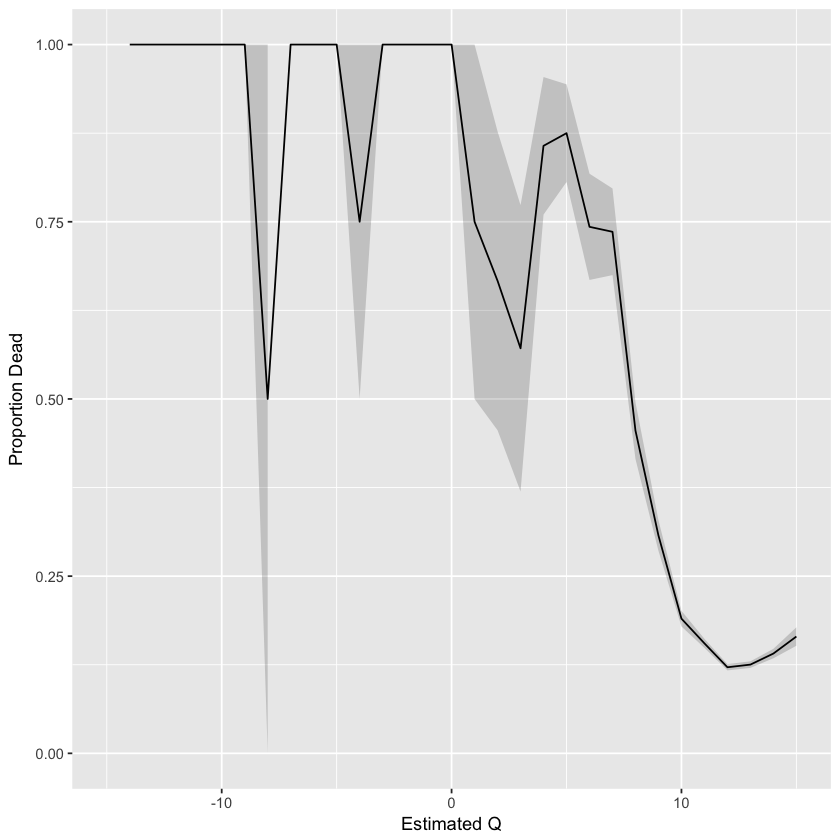

In [47]:
plot_df <- df %>% 
                mutate(bin_Q = floor(predicted_Q)) %>%
                group_by(bin_Q) %>%
                summarise(prop_dead = mean(hospital_expire_flag),
                          sd_dead = sd(hospital_expire_flag)/sqrt(n()))

ggplot(plot_df, aes(x = bin_Q,
                   y = prop_dead)) + 
    geom_ribbon(aes( 
                  ymin = prop_dead - sd_dead,
                  ymax = prop_dead + sd_dead), alpha = 0.2) +
    geom_line() +
    xlim(-15, 15) +
    xlab('Estimated Q') + 
    ylab('Proportion Dead')

`geom_smooth()` using method = 'gam'


ERROR: Error in xlim(-15, 15) + xlab("Estimated Q"): non-numeric argument to binary operator


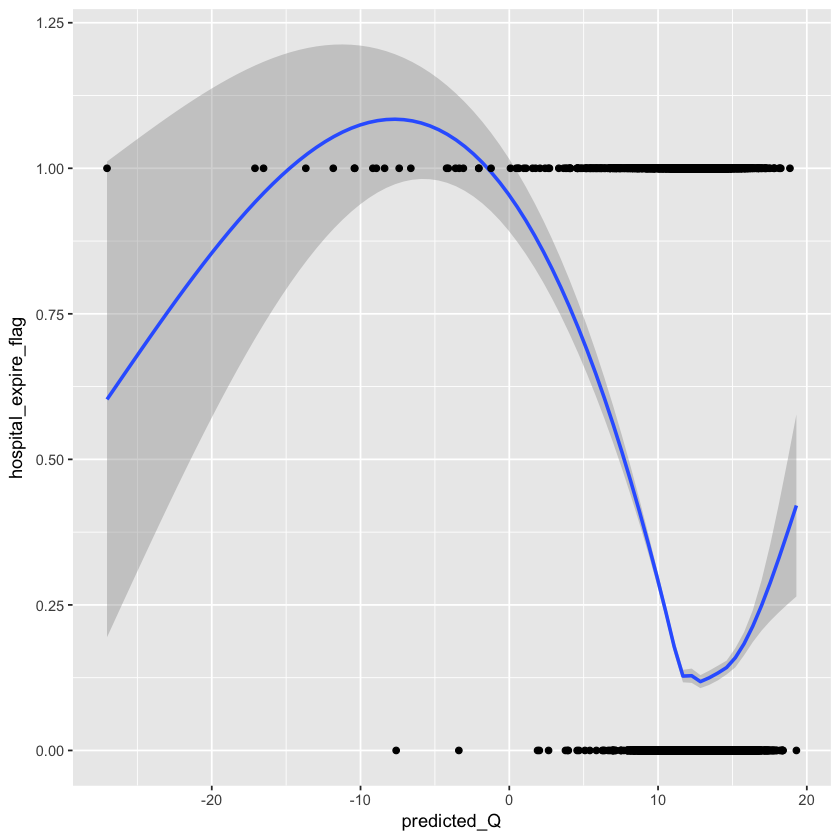

In [57]:
df %>% 
                ggplot(aes(predicted_Q,
                            hospital_expire_flag)) + 
                geom_smooth(span = 0.1) +
                geom_point()
                xlim(-15, 15) +
                xlab('Estimated Q') + 
                ylab('Proportion Dead')


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1067 rows containing non-finite values (stat_bin).”

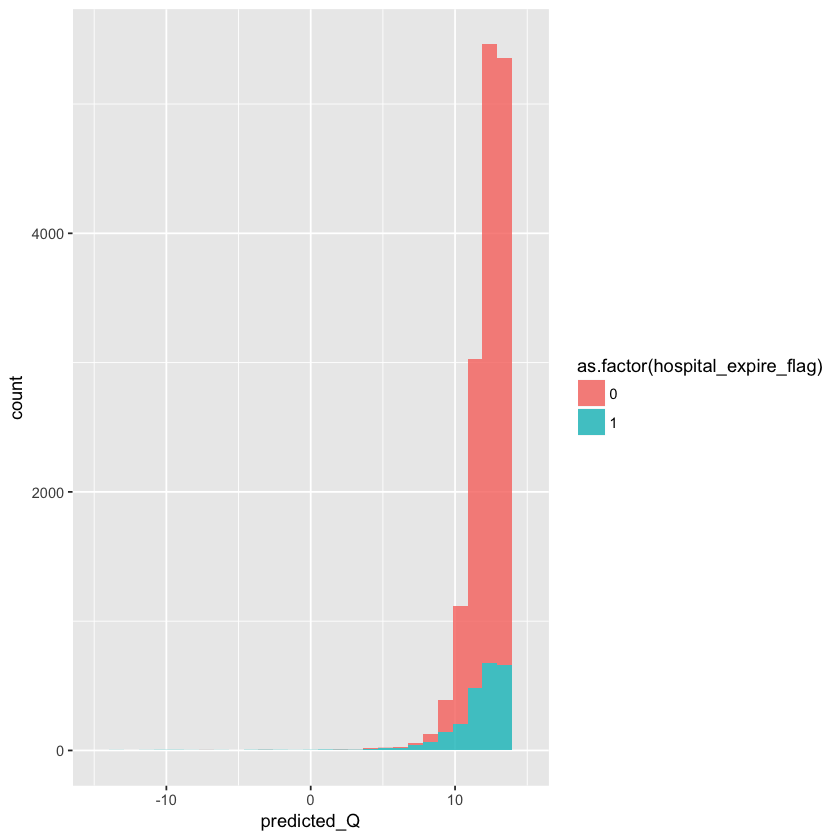

In [71]:
# density or histogram
df %>% 
    ggplot(aes(predicted_Q, fill = as.factor(hospital_expire_flag))) + 
    geom_histogram(alpha = 0.8) +
#     geom_smooth(span = 0.1) +
#     geom_point()
    xlim(-15, 15)
#     xlab('Estimated Q') + 
#     ylab('Proportion Dead')

In [86]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.
`geom_smooth()` using method = 'gam'


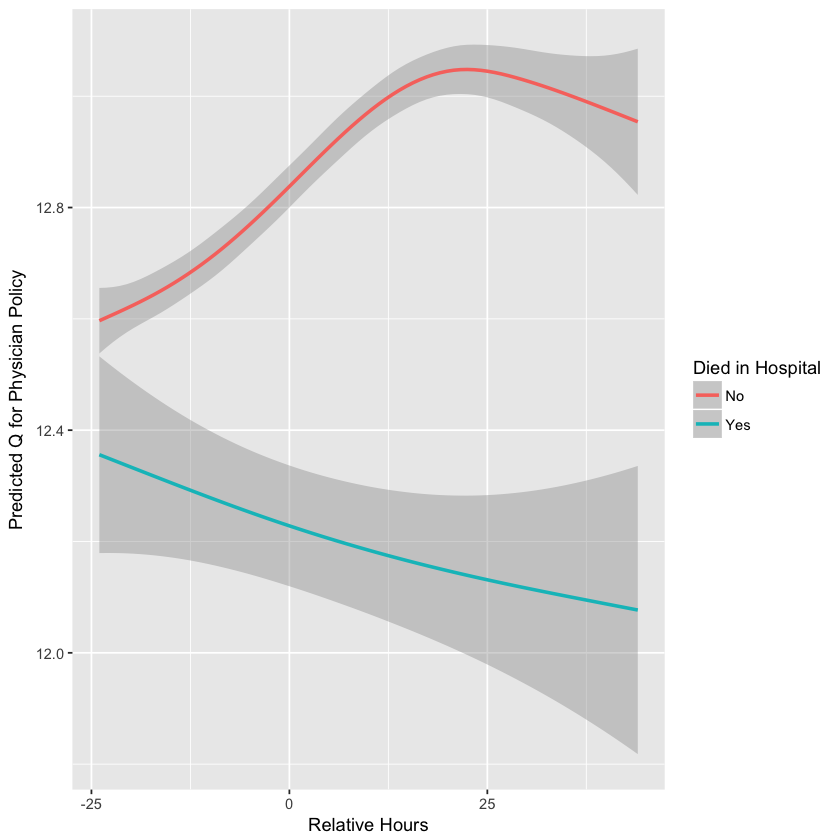

In [87]:
df %>%
    group_by(subject_id) %>%
    mutate(relative_time = difftime(interval_start_time, min(interval_start_time) + hours(24), units = 'hours')) %>%
    ungroup() %>%
    ggplot(aes(relative_time, predicted_Q, color = as.factor(hospital_expire_flag))) +
    geom_smooth() + 
    xlab('Relative Hours') +
    ylab('Predicted Q for Physician Policy') + 
    scale_color_discrete('Died in Hospital', labels = c('No', 'Yes'))